## Libraries

In [1]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
# We import the Linear Regression module from sk learn for the quantity model.
from sklearn.linear_model import LinearRegression

## Data Preparation

In [3]:
#load data
df_purchase = pd.read_csv('data/purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [7]:
# In order to predict we need input and output variables. 
# Our Y is Incidence, as we want to predict the purchase probability for our customers
Y = df_pa['Incidence']

In [8]:
# Our dependant variable is based on the average price of chocolate candy bars. 
# Therefore, X is a data frame, containing the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [9]:
# We create a Logistic Regression model using sk learn. Then we fit the model with our X or price and our Y or incidence.
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [10]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34823844]])

## Price Elasticity of Purchase Probability

A quick reminder, price elasticity of purchase probability is the % change in purchase probability and response to a 1% change and the respective aggregate price for the product category.

In [11]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [12]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49, which somewhat expands the actual observed price range, 
# which is from 1.1 to 2.8. 
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [13]:
df_price_range = pd.DataFrame(price_range)

In [19]:
# We predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]

In [21]:
purchase_pr

array([0.91784867, 0.91606057, 0.9142372 , 0.912378  , 0.91048245,
       0.90855   , 0.90658011, 0.90457225, 0.90252587, 0.90044044,
       0.89831542, 0.89615027, 0.89394447, 0.89169747, 0.88940876,
       0.88707781, 0.88470409, 0.8822871 , 0.87982632, 0.87732126,
       0.8747714 , 0.87217627, 0.86953538, 0.86684826, 0.86411445,
       0.86133348, 0.85850492, 0.85562833, 0.85270329, 0.8497294 ,
       0.84670626, 0.8436335 , 0.84051074, 0.83733764, 0.83411387,
       0.83083912, 0.82751309, 0.82413551, 0.82070612, 0.81722468,
       0.81369099, 0.81010486, 0.80646612, 0.80277463, 0.79903027,
       0.79523296, 0.79138263, 0.78747925, 0.78352281, 0.77951334,
       0.77545089, 0.77133555, 0.76716743, 0.76294668, 0.75867349,
       0.75434807, 0.74997068, 0.74554159, 0.74106114, 0.73652967,
       0.73194758, 0.72731532, 0.72263333, 0.71790214, 0.71312228,
       0.70829434, 0.70341894, 0.69849674, 0.69352844, 0.68851478,
       0.68345654, 0.67835453, 0.6732096 , 0.66802266, 0.66279

In [22]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [23]:
# Create price elasticities master data frame.
# It will contain all the elasticities we calculate during the purchase analytics part of the course.
df_price_elasticities = pd.DataFrame(price_range)

In [24]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096455
1,0.51,-0.100526
2,0.52,-0.104724
3,0.53,-0.109051
4,0.54,-0.113513
...,...,...
295,3.45,-8.013622
296,3.46,-8.038872
297,3.47,-8.064088
298,3.48,-8.089270


In [26]:
# Show all rows
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096455
1,0.51,-0.100526
2,0.52,-0.104724
3,0.53,-0.109051
4,0.54,-0.113513
5,0.55,-0.118111
6,0.56,-0.122848
7,0.57,-0.127730
8,0.58,-0.132758
9,0.59,-0.137936


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

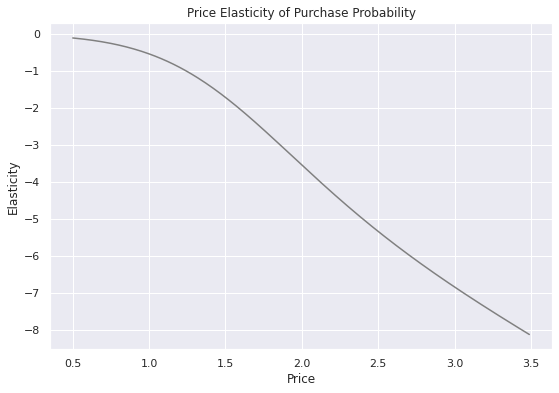

In [27]:
# We display the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
# But to find the precise spot we can consult the price elasticities data frame.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

And let's take a look at the result, great, we can now see the entire elasticity curve and how it changes compared to the price range as a function, the price elasticity decreases as price increases.

No surprise here, the higher the price of a product becomes, the less likely it will be for people to want to buy it.

What is interesting, though, is at what rate this happens. Let's see, the decrease in price is slow in the range between zero point five and one point one, and then it becomes steeper after the one point one mark.

The other important observation we make is that the price elasticities are all negative.

We use the models price coefficient, which is negative two point thirty five, thus indicating the inverse proportionality between price and purchase probability.

And that brings us to the following conclusion, with prices lower than one point twenty five, we can increase our product price without losing too much in terms of purchase, probability for price is higher than one point twenty five. We have more to gain by reducing our prices.

For elastic values we decrease price -> Price sensitive 
For inelastic values we increase price -> No change in demand.